In [1]:
import pandas as pd
import sys

In [2]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [3]:
from huggingface_hub import login

login(token)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_preprocessed.csv")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test_text = x_test["text"].reset_index(drop=True)

dataset_train = pd.concat([x_train, y_train], axis=1).reset_index(drop=True)
dataset_validation = pd.concat([x_val, y_val], axis=1).reset_index(drop=True)
dataset_test = pd.concat([x_test, y_test], axis=1).reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 396046
Number of data to validate: 22003
Number of labels to train: 396046
Number of labels to validate: 22003


###Installation

In [6]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [7]:
!pip install datasets

In [8]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 37.6 MB/s eta 0:00:00


In [9]:
pip install safetensors

In [10]:
!pip install arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 16.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=3338eaa93b12fdc719cadaf429346a9aa5ca8cb7277288d4c7e197f52af7fa9c
  Stored in directory: /root/.cache/pip/wheels/94/08/b4/78657b1541bb704b088317b52429ee4016d9888fe47dbb130f
Successfully built emoji


In [ ]:
import torch
from datasets import Dataset

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###Load model and tokenizer

In [ ]:
# Load model directly
from transformers import BertForSequenceClassification, AutoTokenizer ,Trainer, TrainingArguments, EarlyStoppingCallback, DataCollatorWithPadding
marbert = BertForSequenceClassification.from_pretrained("UBC-NLP/MARBERTv2", num_labels=18)

config.json:   0%|          | 0.00/757 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
marbert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERTv2", trust_remote_code=True)

tokenizer.truncation_side = "left"
sentences = ["مرحبا نحن عمر و علي و هذا مشروع التخرج الخاص بنا"]

token_ids = tokenizer(sentences, truncation=True, max_length=128, return_tensors="pt", return_token_type_ids=False)
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

['[CLS]', 'مرحبا', 'نحن', 'عمر', 'و', 'علي', 'و', 'هذا', 'مشروع', 'التخرج', 'الخاص', 'بنا', '[SEP]']


In [ ]:
if tokenizer.pad_token is None:
  tokenizer.add_special_tokens({'pad_token': '[PAD]'})
  marbert.resize_token_embeddings(len(tokenizer))

###Data Preprocessing

In [ ]:
dataset_train = Dataset.from_pandas(dataset_train)
dataset_validation = Dataset.from_pandas(dataset_validation)
dataset_test = Dataset.from_pandas(dataset_test)

In [ ]:
print(dataset_train)
print(dataset_validation)
print(dataset_test)

Dataset({
    features: ['id', 'dialect', 'text', 'dialect_l_encoded'],
    num_rows: 396046
})
Dataset({
    features: ['id', 'dialect', 'text', 'dialect_l_encoded'],
    num_rows: 22003
})
Dataset({
    features: ['id', 'dialect', 'text', 'dialect_l_encoded'],
    num_rows: 22003
})


In [ ]:
def tokenization(example):
  tokens = tokenizer(example["text"], add_special_tokens=True, max_length=128, truncation=True, return_tensors="np")

  return {
      "input_ids": tokens["input_ids"],
      "attention_mask": tokens["attention_mask"],
      "labels": example["dialect_l_encoded"]
  }

In [ ]:
train_dataset = dataset_train.map(tokenization, batched=True)
val_dataset = dataset_validation.map(tokenization, batched=True)
test_dataset = dataset_test.map(tokenization, batched=True)

Map:   0%|          | 0/396046 [00:00<?, ? examples/s]

Map:   0%|          | 0/22003 [00:00<?, ? examples/s]

Map:   0%|          | 0/22003 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_dataset.remove_columns(['id', 'dialect', 'dialect_l_encoded'])
val_dataset = val_dataset.remove_columns(['id', 'dialect', 'dialect_l_encoded'])
test_dataset = test_dataset.remove_columns(['id', 'dialect', 'dialect_l_encoded'])

In [ ]:
print(train_dataset[0].keys())
print(val_dataset[0].keys())
print(test_dataset[0].keys())

dict_keys(['text', 'input_ids', 'attention_mask', 'labels'])
dict_keys(['text', 'input_ids', 'attention_mask', 'labels'])
dict_keys(['text', 'input_ids', 'attention_mask', 'labels'])


###Finetunning

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
training_args = TrainingArguments(
    output_dir="./marbert",
    learning_rate=1.5e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    logging_strategy="steps",
    logging_steps=500,
    report_to="none",  # Prevents `wandb` or other loggers
    gradient_accumulation_steps=2,
    lr_scheduler_type="linear",
    bf16=True,
    warmup_ratio=0.1,  # Warmup for stable early training
    max_grad_norm=1.0,  # Prevents exploding gradients
)

In [ ]:
trainer = Trainer(
    model=marbert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.337000,1.260556,0.605554,0.599449
2,1.127500,1.168579,0.632732,0.630001
3,0.951100,1.156659,0.642003,0.638422
4,0.834300,1.169132,0.647684,0.645327


TrainOutput(global_step=12380, training_loss=1.166056530387028, metrics={'train_runtime': 3054.4995, 'train_samples_per_second': 648.299, 'train_steps_per_second': 5.066, 'total_flos': 5.544876713097211e+16, 'train_loss': 1.166056530387028, 'epoch': 4.0})

In [ ]:
trainer.save_model("marbertv2")

###Testing

In [ ]:
trainer.evaluate()

{'eval_loss': 1.1566592454910278,
 'eval_accuracy': 0.6420033631777485,
 'eval_f1_score': 0.6384222234450619,
 'eval_runtime': 11.3544,
 'eval_samples_per_second': 1937.832,
 'eval_steps_per_second': 15.148,
 'epoch': 4.0}

In [ ]:
preds_output = trainer.predict(test_dataset)

In [ ]:
logits = np.argmax(preds_output.predictions, axis=1)

**Correct Labels ✅**

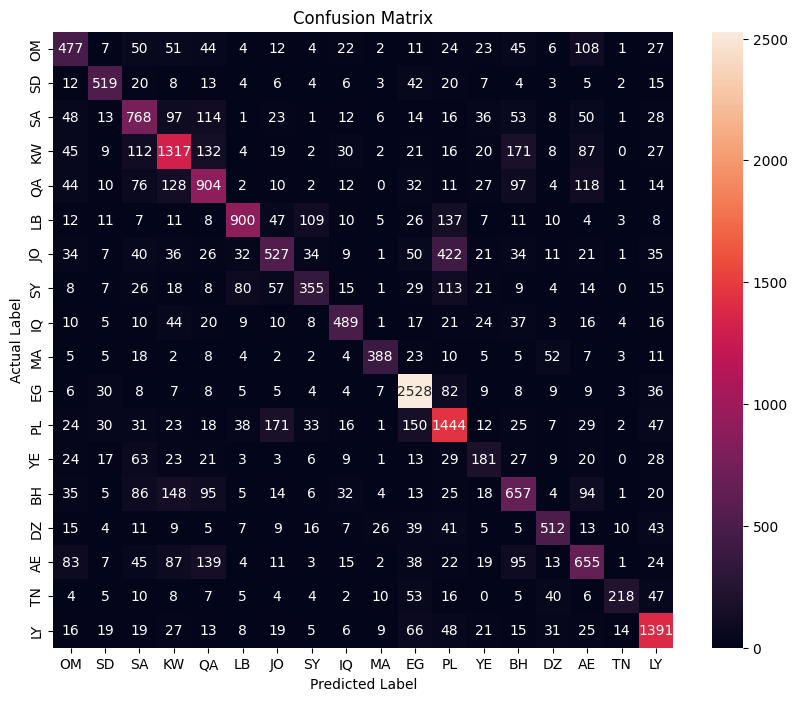

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          OM     0.5288    0.5196    0.5242       918
          SD     0.7310    0.7489    0.7398       693
          SA     0.5486    0.5958    0.5712      1289
          KW     0.6443    0.6513    0.6478      2022
          QA     0.5711    0.6059    0.5880      1492
          LB     0.8072    0.6787    0.7374      1326
          JO     0.5553    0.3930    0.4603      1341
          SY     0.5936    0.4551    0.5152       780
          IQ     0.6986    0.6573    0.6773       744
          MA     0.8273    0.7004    0.7586       554
          EG     0.7987    0.9133    0.8522      2768
          PL     0.5783    0.6873    0.6281      2101
          YE     0.3969    0.3795    0.3880       477
          BH     0.5042    0.5206    0.5123      1262
          DZ     0.6975    0.6589    0.6777       777
          AE     0.5113    0.5186    0.5149      1263
          TN     0.8226    0.4910    0.6150       444
 

oman 52%
jordan 46%
yemen 38%
bahrain 51%
emirates 51%
syria 51%

###Inference

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from arabert.preprocess import ArabertPreprocessor
import torch

In [24]:
DIALECT_LABELS = [
    "Oman", "Sudan", "Saudi Arabia", "Kuwait", "Qatar", "Lebanon", "Jordan",
    "Syria", "Iraq", "Morocco", "Egypt", "Palestine", "Yemen", "Bahrain",
    "Algeria", "United Arab Emirates", "Tunisia", "Libya"
]

text = "مساءو ايه الاخبار"

In [19]:
MODEL_NAME = "UBC-NLP/MARBERTv2"
MODEL_DIR = "/content/drive/MyDrive/marbertv2 ft/"

In [20]:
def load_model():
    tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
    preprocessor = ArabertPreprocessor(model_name=MODEL_NAME)
    model.eval()
    return tokenizer, model, preprocessor

tokenizer, model, arabert_prep = load_model()

In [15]:
def predict(text):
    clean_text = arabert_prep.preprocess(text)
    inputs = tokenizer(clean_text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)

    with torch.inference_mode():
        logits = model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
    predicted_dialect = DIALECT_LABELS[pred]

    return predicted_dialect

In [25]:
predicted_dialect = predict(text)
print(f"predicted dialect is {predicted_dialect}")

predicted dialect is Egypt
